# Vehical Price prediction (Regression Problem)

### This algorithm will take vehical details like mileage,engine type ,number of doors,length,width,height,engine capacity etc...

In [1]:
import pandas as pd

## Step 1: Load the data

In [2]:
df = pd.read_csv('auto.txt')
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


## Step 2: Clean the data

### in the below data where ever we are having ? replacing this by using numpy NaN 

In [3]:
import numpy as np

df.replace('?',np.nan,inplace=True)
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [4]:
df.dtypes  # checking all column datatype

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [5]:
df['price'] = pd.to_numeric(df['price'],errors='coerce')
df['horsepower'] = pd.to_numeric(df['horsepower'],errors='coerce')
df['peak-rpm'] = pd.to_numeric(df['peak-rpm'],errors='coerce')
df['bore'] = pd.to_numeric(df['bore'],errors='coerce')
df['stroke'] = pd.to_numeric(df['stroke'],errors = 'coerce')

### Remove unwanted columns from the dataframe 

In [6]:
df.drop('normalized-losses',axis=1, inplace=True)
df.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


# 

### Convert all the strings into integer value 

In [7]:
eng_loc = {
}

x = df['engine-location'].unique()

eng_loc = {}
for i in range(len(x)):
    eng_loc[x[i]] = i+1

df['engine-location'].replace(eng_loc,inplace=True)
df['engine-location']=pd.to_numeric(df['engine-location'])

In [8]:
dict = {
  }

cylinder = df['num-of-cylinders'].unique()
for i in range(len(cylinder)):
    dict[cylinder[i]] = i+1
print(dict)
df['num-of-cylinders'].replace(dict,inplace=True)
df['num-of-cylinders'] = pd.to_numeric(df['num-of-cylinders'])

{'four': 1, 'six': 2, 'five': 3, 'three': 4, 'twelve': 5, 'two': 6, 'eight': 7}


In [9]:
df.columns

Index(['symboling', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [10]:
# make_car = {
# 	'alfa-romero':1,
# 	'audi':2,
# 	'bmw':3,
# 	'chevrolet':4,
# 	'dodge':5,
# 	'honda':6,
# 	'isuzu':7,
# 	'jaguar':8,
# 	'mazda':9,
# 	'mercedes-benz':10,
# 	'mercury':11,
# 	'mitsubishi':12,
# 	'nissan':13,
# 	'peugot':14,
# 	'plymouth':15,
# 	'porsche':16,
# 	'renault':17,
# 	'saab' :18,
# 	'subaru':19,
# 	'toyota':20,
# 	'volkswagen':21,
# 	'volvo':22
# }

make_car={}
car = df['make'].unique()

for i in range(len(car)):
    make_car[car[i]] = i+1
print(make_car)
df['make'].replace(make_car,inplace=True)
df['make'] = pd.to_numeric(df['make'])

{'alfa-romero': 1, 'audi': 2, 'bmw': 3, 'chevrolet': 4, 'dodge': 5, 'honda': 6, 'isuzu': 7, 'jaguar': 8, 'mazda': 9, 'mercedes-benz': 10, 'mercury': 11, 'mitsubishi': 12, 'nissan': 13, 'peugot': 14, 'plymouth': 15, 'porsche': 16, 'renault': 17, 'saab': 18, 'subaru': 19, 'toyota': 20, 'volkswagen': 21, 'volvo': 22}


In [11]:
asp_car={
}

asp = df['aspiration'].unique()

for i in range(len(asp)):
    asp_car[asp[i]] = i+1
    
df['aspiration'].replace(asp_car,inplace=True)
df['aspiration'] = pd.to_numeric(df['aspiration'])

In [12]:
num_doors = {
}

door = df['num-of-doors'].unique()

for i in range(len(door)):
    num_doors[door[i]] = i+1
df['num-of-doors'].replace(num_doors,inplace=True)
df['num-of-doors'] = pd.to_numeric(df['num-of-doors'])

In [13]:
df['body-style'].head(100).unique

<bound method Series.unique of 0     convertible
1     convertible
2       hatchback
3           sedan
4           sedan
         ...     
95      hatchback
96          sedan
97          wagon
98        hardtop
99      hatchback
Name: body-style, Length: 100, dtype: object>

In [14]:
body_style = {
}

style  = df['body-style'].unique()

for i in range(len(style)):
    body_style[style[i]] = i+1
    
df['body-style'].replace(body_style,inplace=True)
df['body-style'] = pd.to_numeric(df['body-style'])

In [15]:
drive_wheels = {
}

wheel = df['drive-wheels'].unique()

for i in range(len(wheel)):
    drive_wheels[wheel[i]] = i+1
    
df['drive-wheels'].replace(drive_wheels,inplace=True)
df['drive-wheels'] = pd.to_numeric(df['drive-wheels'])

In [16]:
engine_type = {
   
}

engine = df['engine-type'].unique()

for i in range(len(engine)):
    engine_type[engine[i]] = i+1

df['engine-type'].replace(engine_type,inplace=True)
df['engine-type'] = pd.to_numeric(df['engine-type'])

In [17]:
fule_sys = {
   
}

fuel = df['fuel-system'].unique()

for i in range(len(fuel)):
    fule_sys[fuel[i]] = i+1
    
df['fuel-system'].replace(fule_sys,inplace=True)
df['fuel-system'] = pd.to_numeric(df['fuel-system'])

In [18]:
fuel_type = {
    
}

ftype = df['fuel-type'].unique()

for i in range(len(ftype)):
    fuel_type[ftype[i]] = i+1
    
df['fuel-type'].replace(fuel_type,inplace=True)
df['fuel-type'] = pd.to_numeric(df['fuel-type'])

### Filling NaN values

In [19]:
df.isna().sum()   # Checking are we having any nan values or not

symboling            0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

In [20]:
df.fillna({
    'bore' : df['bore'].mean(),
    'stroke':df['stroke'].mean(),
    'horsepower' : df['horsepower'].mean(),
    'peak-rpm' : df['peak-rpm'].mean(),
    'price':df['price'].mean(),
},inplace=True)

<!-- num_mean = df['num-of-doors'].mean()
bore_mean = df['bore'].mean()
stroke_mean = df['stroke'].mean()
horse_mean = df['horsepower'].mean()
peak_mean = df['peak-rpm'].mean()
price_mean =  df['price'].mean()
fillna_dict = {
    'num-of-doors' : num_mean,
    'bore' : bore_mean,
    'stroke' : stroke_mean,
    'horsepower': horse_mean,
    'peak-rpm' : peak_mean,
    'price' :price_mean
}


df.fillna(fillna_dict,inplace=True) -->

In [21]:
# df = df.dropna()  # dropping a rows if it is having Nan Values
df

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,1,1,1,1.0,1,1,1,88.6,168.8,...,130,1,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,1,1,1,1.0,1,1,1,88.6,168.8,...,130,1,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,1,1,1,1.0,2,1,1,94.5,171.2,...,152,1,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,2,1,1,2.0,3,2,1,99.8,176.6,...,109,1,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,2,1,1,2.0,3,3,1,99.4,176.6,...,136,1,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,22,1,1,2.0,3,1,1,109.1,188.8,...,141,1,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,22,1,2,2.0,3,1,1,109.1,188.8,...,141,1,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,22,1,1,2.0,3,1,1,109.1,188.8,...,173,1,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,22,2,2,2.0,3,1,1,109.1,188.8,...,145,7,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [22]:
df.drop(['horsepower','curb-weight','peak-rpm','length'],inplace=True,axis=1)

## Step 3: Splitting the data for train and test

<h3> Spliting a model </h3>

In [23]:
from sklearn.model_selection import train_test_split
# lets feed our data to machine learning model
x = df.drop('price', axis=1)

y = df['price']

# split data into 80% for training, 20% for testing
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=0)

<h3> Training a model </h3>

### 1) Linear regression algorithm 

In [24]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()

# x_train.dtypes
linear_model.fit(x_train,y_train)

LinearRegression()

<h3> Testing a model </h3>

In [25]:
linear_model.score(x_test,y_test)

0.6947360032801743

In [26]:
linear_model.coef_

array([  235.09314662,  -136.90466929, -5643.54946059,  2336.34345376,
         944.45725063,  -507.24790288, -1721.96691056, 16180.07118308,
         105.44706496,   593.58970015,   201.93234693,  -170.09961047,
        1040.21993322,    86.98878517,  -152.12497739,  -569.4483144 ,
       -1987.07721298,   479.74952919,   -98.43322682,    16.81452463])

In [27]:
predict = x_train.columns
coef = pd.Series(linear_model.coef_,predict).sort_values()
print(coef)

fuel-type            -5643.549461
stroke               -1987.077213
drive-wheels         -1721.966911
bore                  -569.448314
body-style            -507.247903
engine-type           -170.099610
fuel-system           -152.124977
make                  -136.904669
city-mpg               -98.433227
highway-mpg             16.814525
engine-size             86.988785
wheel-base             105.447065
height                 201.932347
symboling              235.093147
compression-ratio      479.749529
width                  593.589700
num-of-doors           944.457251
num-of-cylinders      1040.219933
aspiration            2336.343454
engine-location      16180.071183
dtype: float64


### Testing a model

In [28]:
y_predict = linear_model.predict(x_test)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


C:\Users\LENOVO\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['style']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


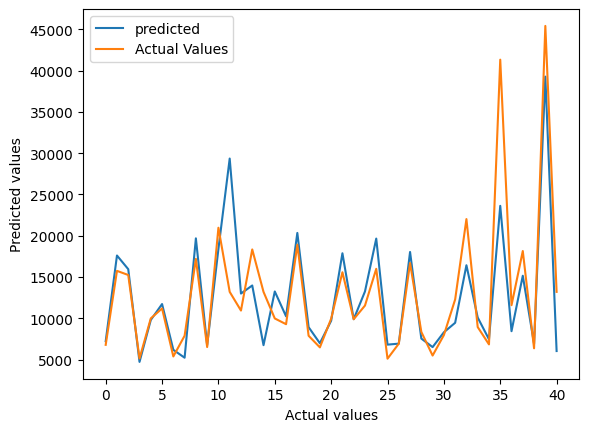

In [29]:
import matplotlib.pyplot as plt
%pylab inline
# pylab.rcParams['figure.figsize'] = (15,10)
plt.plot(y_predict,label='predicted')
plt.plot(y_test.values,label='Actual Values' )
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()

### Finding errors  in in this algorithm 

In [37]:
from sklearn.metrics import mean_squared_error

lmodel_mse =  mean_squared_error(y_predict,y_test)
math.sqrt(lmodel_mse)
# lmodel_mse

4568.474538335912

<p style="font-size:20px"> In this algorithm error is mor.In regression problem if <b>error is less</b> that is the best algorithm</p>

### 2) Lasso Algorithm 

In [31]:
from sklearn.linear_model  import Lasso

lass_model = Lasso(alpha=0.5)
lass_model.fit(x_train,y_train)

Lasso(alpha=0.5)

In [32]:
lass_predict  = lass_model.predict(x_test)
lass_model.score(x_test,y_test)

0.6953046079019941

In [33]:
lass_mod_mse = mean_squared_error(lass_predict,y_test)
math.sqrt(lass_mod_mse)

4564.21778592863

### 3) Ridge Algorithm 

In [34]:
from sklearn.linear_model import Ridge

rmodel = Ridge()
rmodel.fit(x_train,y_train)

Ridge()

In [35]:
rpredict = rmodel.predict(x_test)
print(rmodel.score(x_test,y_test))
rmodel_mse = mean_squared_error(rpredict,y_test)
print( math.sqrt(rmodel_mse))

0.6709389085919408
4743.202679670164
